<a href="https://colab.research.google.com/github/ZackMcz/Telecom-X-Parte-2/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **🛠️ Preparação dos Dados**

In [2]:
import pandas as pd
dados_telecom = pd.read_csv('/content/telecom_data_tratado.csv')
dados_telecom

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0.0,0,0,1,1,9,1,1,65.60,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0.0,1,0,0,0,9,1,0,59.90,...,False,False,True,True,False,False,False,False,False,True
2,0004-TLHLJ,1.0,1,0,0,0,4,1,1,73.90,...,True,False,False,True,False,False,False,False,True,False
3,0011-IGKFF,1.0,1,1,1,0,13,1,1,98.00,...,False,False,True,True,False,False,False,False,True,False
4,0013-EXCHZ,1.0,0,1,1,0,3,1,1,83.90,...,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0.0,0,0,0,0,13,1,0,55.15,...,True,False,False,False,True,False,False,False,False,True
7039,9992-RRAMN,1.0,1,0,1,0,22,1,1,85.10,...,False,False,True,True,False,False,False,False,True,False
7040,9992-UJOEL,0.0,1,0,0,0,2,1,1,50.30,...,True,False,False,True,False,False,False,False,False,True
7041,9993-LHIEB,0.0,1,0,1,1,67,1,0,67.85,...,False,False,True,False,False,True,False,False,False,True


# **Remoção de Colunas Irrelevantes**

# Separamos aqui a coluna 'customerID' em um novo DataFrame
# Isso garante que a informação seja mantida para rastreabilidade

In [3]:
customer_ids = dados_telecom['customerID'].copy()
customer_ids

,customerID
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
...,...
7038,9987-LUTYD
7039,9992-RRAMN
7040,9992-UJOEL
7041,9993-LHIEB


# **Verificação da Proporção de Evasão**
# Calculamos a proporção de cada classe na coluna 'Churn'  
# Usamos o método .value_counts() com o parâmetro 'normalize=True' para obter diretamente as proporções em vez de apenas a contagem.
Esta é a forma mais eficiente de realizar o cálculo, conforme solicitado.


In [23]:
churn_proportions = dados_telecom['Churn'].value_counts(normalize=True)

# Exibimos o resultado

In [24]:
print("Proporção de clientes que evadiram (Churn) vs. que permaneceram:")
print(churn_proportions)
print("-" * 50)

Proporção de clientes que evadiram (Churn) vs. que permaneceram:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64
--------------------------------------------------


# Avaliamos o desequilíbrio das classes
## O valor '0.0' representa clientes que permaneceram ('No Churn')
## O valor '1.0' representa clientes que evadiram ('Churn')

In [25]:
proporcao_evasao = churn_proportions.get(1.0, 0)
proporcao_permanencia = churn_proportions.get(0.0, 0)

if proporcao_evasao / proporcao_permanencia < 0.5:
    print(f"Resultado da Avaliação: Há um desequilíbrio significativo entre as classes.")
    print(f"Proporção de Evasão (1.0): {proporcao_evasao:.2%}")
    print(f"Proporção de Permanência (0.0): {proporcao_permanencia:.2%}")
    print("\nImpacto para a Análise:")
    print("Modelos preditivos podem ter dificuldade em prever a classe minoritária (evasão),")
    print("e métricas como a acurácia podem ser enganosas. É recomendável utilizar técnicas de ")
    print("tratamento de desequilíbrio (como oversampling, undersampling) ou métricas de avaliação")
    print("adequadas (como Precisão, Recall, F1-Score) na fase de modelagem.")
else:
    print(f"Resultado da Avaliação: As classes estão relativamente equilibradas.")

Resultado da Avaliação: Há um desequilíbrio significativo entre as classes.
Proporção de Evasão (1.0): 26.54%
Proporção de Permanência (0.0): 73.46%

Impacto para a Análise:
Modelos preditivos podem ter dificuldade em prever a classe minoritária (evasão),
e métricas como a acurácia podem ser enganosas. É recomendável utilizar técnicas de 
tratamento de desequilíbrio (como oversampling, undersampling) ou métricas de avaliação
adequadas (como Precisão, Recall, F1-Score) na fase de modelagem.


In [26]:
!pip install imbalanced-learn

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [28]:
df = pd.read_csv('telecom_data_tratado.csv')

# Definimos as colunas de features (variáveis independentes) e o target  (variável dependente)
# Excluímos 'customerID' e 'Churn'

In [29]:
features = df.drop(columns=['customerID', 'Churn'])
target = df['Churn']

# Dividimos os dados em conjunto de treino e teste
# O 'stratify=target' garante que a proporção das classes (Churn/Não Churn) seja a mesma nos conjuntos de treino e teste, o que é crucial para dados desbalanceados.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Proporção das classes no conjunto de treino original:")
print(y_train.value_counts(normalize=True))
print("-" * 50)


Proporção das classes no conjunto de treino original:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64
--------------------------------------------------


# **Balanceamento de Classes**
--- MODELO BASE (SEM SMOTE) ---

In [31]:
print(">>> Avaliação do Modelo Base (sem SMOTE) <<<")


>>> Avaliação do Modelo Base (sem SMOTE) <<<


In [32]:
from sklearn.impute import SimpleImputer
import numpy as np

print(">>> Avaliação do Modelo Base (sem SMOTE) <<<")

# Identificar colunas numéricas e não numéricas
numeric_features = features.select_dtypes(include=np.number).columns
non_numeric_features = features.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)

# Treinar o modelo de Regressão Logística no conjunto de treino original (agora imputado e com booleanas convertidas)
model_base = LogisticRegression(max_iter=1000)
model_base.fit(X_train_processed, y_train)

# Fazer previsões no conjunto de teste original (agora imputado e com booleanas convertidas)
y_pred_base = model_base.predict(X_test_processed)

# Gerar e exibir o relatório de classificação
print(classification_report(y_test, y_pred_base))
print("-" * 50)

# --- MODELO COM SMOTE ---
print(">>> Avaliação do Modelo com SMOTE <<<")

# Aplicar SMOTE APENAS no conjunto de treino processado
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("Proporção das classes no conjunto de treino APÓS SMOTE:")
print(y_train_resampled.value_counts(normalize=True))
print("-" * 50)

# Treinar um novo modelo no conjunto de dados balanceado (após SMOTE)
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_resampled, y_train_resampled)

# Fazer previsões no mesmo conjunto de teste original (agora imputado e com booleanas convertidas)
y_pred_smote = model_smote.predict(X_test_processed)

# Gerar e exibir o relatório de classificação
print(classification_report(y_test, y_pred_smote))
print("-" * 50)

# --- RESUMO E COMPARAÇÃO ---
print(">>> Comparação das Métricas (Classe '1.0' - Churn) <<<")
report_base = classification_report(y_test, y_pred_base, output_dict=True)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)

print(f"Modelo Base (sem SMOTE):")
print(f"  Recall: {report_base['1.0']['recall']:.2f}")
print(f"  F1-Score: {report_base['1.0']['f1-score']:.2f}")

print(f"\nModelo com SMOTE:")
print(f"  Recall: {report_smote['1.0']['recall']:.2f}")
print(f"  F1-Score: {report_smote['1.0']['f1-score']:.2f}")

>>> Avaliação do Modelo Base (sem SMOTE) <<<


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

--------------------------------------------------
>>> Avaliação do Modelo com SMOTE <<<
Proporção das classes no conjunto de treino APÓS SMOTE:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64
--------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.73      0.81      1035
         1.0       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409

--------------------------------------------------
>>> Comparação das Métricas (Classe '1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Carregar o dataframe
# Supondo que o arquivo 'telecom_data_tratado.csv' já foi carregado no ambiente do Colab
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto do Google Colab.")
    exit()

print("DataFrame original (primeiras 5 linhas):")
print(df.head())
print("-" * 50)

# 2. Identificar as colunas numéricas que precisam de padronização
# As colunas numéricas são 'tenure', 'Charges.Monthly' e 'Charges.Total'
# As outras colunas são categóricas (já em formato binário) e não precisam de escalonamento.
numerical_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

# 3. Separar features (X) e target (y) antes do escalonamento
# Excluímos 'customerID' e 'Churn'
features = df.drop(columns=['customerID', 'Churn'])
target = df['Churn']

# 4. Dividir os dados em conjuntos de treino e teste
# Isso é crucial para evitar o "data leakage" (vazamento de dados), onde
# informações do conjunto de teste influenciam o treinamento.
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Conjunto de treino (apenas colunas numéricas) antes da padronização:")
print(X_train[numerical_cols].head())
print("-" * 50)

# 5. Instanciar o StandardScaler
scaler = StandardScaler()

# 6. Aplicar o scaler nos dados de treino e teste
# O método .fit_transform() calcula a média e o desvio padrão e, em seguida,
# transforma os dados de treino.
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# O método .transform() usa os parâmetros (média e desvio padrão) calculados
# no conjunto de treino para transformar o conjunto de teste. Isso garante que
# o modelo não tenha acesso a nenhuma informação do teste.
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 7. Exibir o resultado da padronização
print("Conjunto de treino (apenas colunas numéricas) APÓS a padronização:")
print(X_train[numerical_cols].head())
print("\nNota: Os valores agora têm média próxima de 0 e desvio padrão de 1.")
print("-" * 50)

# Agora os dataframes 'X_train' e 'X_test' estão prontos para a modelagem.
# As colunas numéricas foram devidamente padronizadas.

# **🎯 Correlação e Seleção de Variáveis**
## Visualização  da matriz de correlação para identificar relações entre variáveis numéricas #

# **AnálisesDirecionadas**

DataFrame carregado com sucesso. Primeiras 5 linhas:
   customerID  Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-ORFBO    0.0       0              0        1           1       9   
1  0003-MKNFE    0.0       1              0        0           0       9   
2  0004-TLHLJ    1.0       1              0        0           0       4   
3  0011-IGKFF    1.0       1              1        1           0      13   
4  0013-EXCHZ    1.0       0              1        1           0       3   

   PhoneService  PaperlessBilling  Charges.Monthly  ...  StreamingMovies_No  \
0             1                 1             65.6  ...                True   
1             1                 0             59.9  ...               False   
2             1                 1             73.9  ...                True   
3             1                 1             98.0  ...               False   
4             1                 1             83.9  ...                True   

   StreamingMov

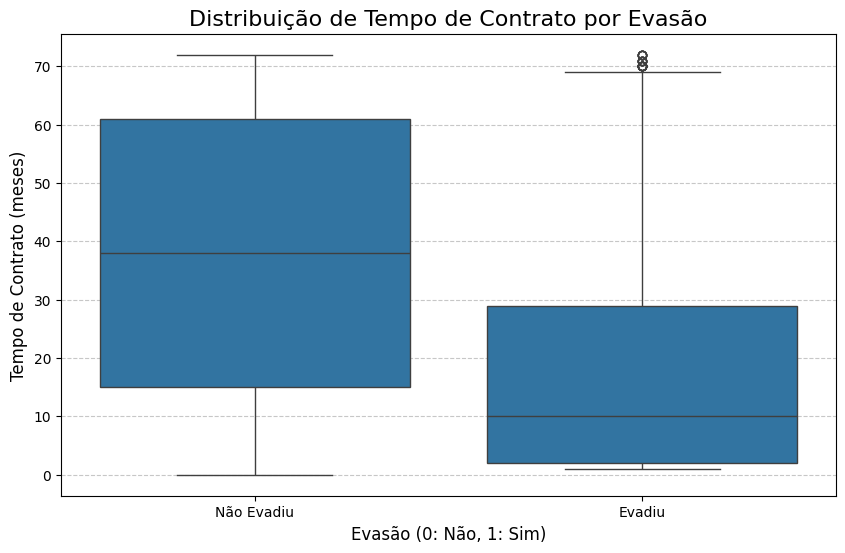

--------------------------------------------------


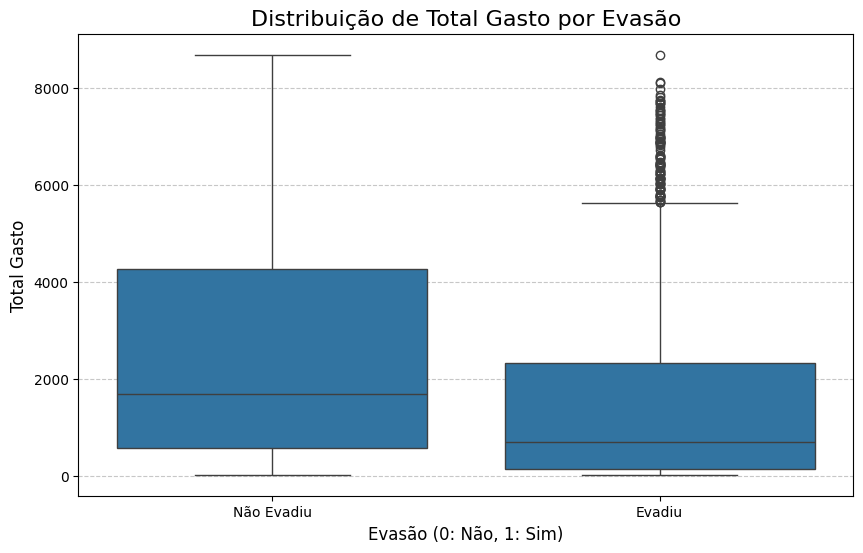

--------------------------------------------------


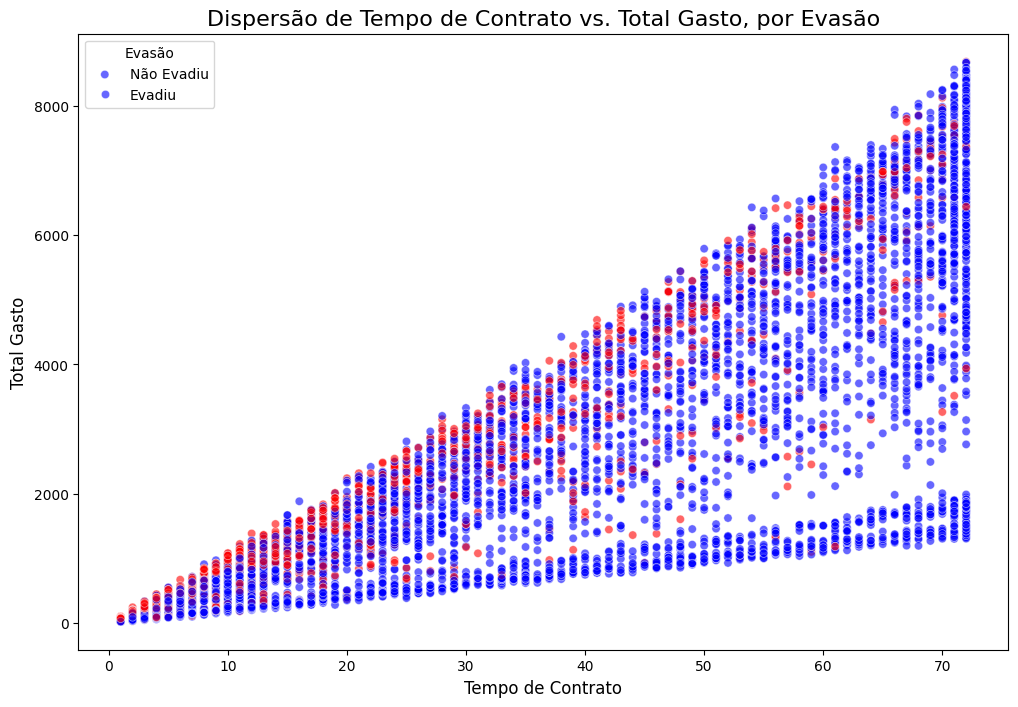

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carregar o dataframe
# Certifique-se de que o arquivo 'telecom_data_tratado.csv' esteja no seu ambiente
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto do Google Colab.")
    exit()

print("DataFrame carregado com sucesso. Primeiras 5 linhas:")
print(df.head())
print("-" * 50)

# 2. Plotar a relação entre Tempo de Contrato (tenure) e Evasão (Churn)
# O boxplot é ideal para comparar a distribuição de uma variável numérica
# entre diferentes grupos de uma variável categórica.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Distribuição de Tempo de Contrato por Evasão', fontsize=16)
plt.xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("-" * 50)

# 3. Plotar a relação entre Total Gasto (Charges.Total) e Evasão (Churn)
# Novamente, um boxplot é a melhor escolha para comparar as distribuições.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Total', data=df)
plt.title('Distribuição de Total Gasto por Evasão', fontsize=16)
plt.xlabel('Evasão (0: Não, 1: Sim)', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.xticks([0, 1], ['Não Evadiu', 'Evadiu'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("-" * 50)

# 4. Plotar um scatter plot para visualizar a relação entre as duas variáveis
# numéricas e como elas se relacionam com a evasão
plt.figure(figsize=(12, 8))
sns.scatterplot(x='tenure', y='Charges.Total', hue='Churn', data=df, alpha=0.6,
                palette={0: 'blue', 1: 'red'})
plt.title('Dispersão de Tempo de Contrato vs. Total Gasto, por Evasão', fontsize=16)
plt.xlabel('Tempo de Contrato', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.legend(title='Evasão', labels=['Não Evadiu', 'Evadiu'])
plt.show()


#  🤖 **Modelagem Preditiva**
## Separação de Dados

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Carregar o dataframe tratado
# Certifique-se de que o arquivo 'telecom_data_tratado.csv' está no seu ambiente
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto do Google Colab.")
    exit()

print("Formato do DataFrame original:", df.shape)
print("-" * 50)

# 2. Separar as features (X) e a variável-alvo (y)
# 'X' conterá todas as colunas exceto 'customerID' e 'Churn'
# 'y' conterá apenas a coluna 'Churn'
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# 3. Dividir os dados em conjuntos de treino e teste
# test_size=0.20 significa que 20% dos dados serão para o teste
# random_state=42 garante que a divisão seja a mesma a cada execução
# stratify=y garante que a proporção de 'Churn' seja a mesma em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 4. Exibir o formato dos conjuntos resultantes
print("Formato do conjunto de treino (X_train):", X_train.shape)
print("Formato do conjunto de teste (X_test):", X_test.shape)
print("Formato do conjunto de treino (y_train):", y_train.shape)
print("Formato do conjunto de teste (y_test):", y_test.shape)
print("-" * 50)

# 5. Verificar a proporção de Churn em cada conjunto (para confirmar a estratificação)
print("Proporção de Churn no conjunto de dados completo:")
print(y.value_counts(normalize=True))
print("\nProporção de Churn no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de Churn no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Formato do DataFrame original: (7043, 42)
--------------------------------------------------
Formato do conjunto de treino (X_train): (5634, 40)
Formato do conjunto de teste (X_test): (1409, 40)
Formato do conjunto de treino (y_train): (5634,)
Formato do conjunto de teste (y_test): (1409,)
--------------------------------------------------
Proporção de Churn no conjunto de dados completo:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

Proporção de Churn no conjunto de treino:
Churn
0.0    0.734647
1.0    0.265353
Name: proportion, dtype: float64

Proporção de Churn no conjunto de teste:
Churn
0.0    0.734564
1.0    0.265436
Name: proportion, dtype: float64


# Criação de Modelos

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np

# Carregar o dataframe tratado
# Verifique se o arquivo está no ambiente
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto.")
    exit()

# Separar features (X) e variável-alvo (y)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Dividir os dados em conjuntos de treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Dados divididos em treino e teste.")
print("-" * 50)

# --- Pré-processamento: Imputação de Valores Ausentes e Conversão de Booleanas ---

# Identificar colunas numéricas e não numéricas
numeric_features = X_train.select_dtypes(include=np.number).columns
non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)


### MODELO 1: REGRESSÃO LOGÍSTICA COM PADRONIZAÇÃO

print("Iniciando o treinamento do modelo de Regressão Logística...")

# Justificativa da normalização:
# A Regressão Logística é sensível à escala das features.
# A padronização (StandardScaler) garante que todas as features tenham a mesma
# importância na otimização do modelo, melhorando a performance.

# Identificar as colunas numéricas NO CONJUNTO PROCESSADO para padronização
# (Assumindo que as colunas numéricas imputadas são as primeiras após a concatenação)
# Precisamos saber quantas colunas numéricas existem para selecionar corretamente
num_numeric_cols = len(numeric_features)
X_train_lr_numeric = X_train_processed[:, :num_numeric_cols]
X_test_lr_numeric = X_test_processed[:, :num_numeric_cols]
X_train_lr_non_numeric = X_train_processed[:, num_numeric_cols:]
X_test_lr_non_numeric = X_test_processed[:, num_numeric_cols:]


# Instanciar e aplicar o StandardScaler APENAS às colunas numéricas imputadas
scaler = StandardScaler()
X_train_lr_scaled_numeric = scaler.fit_transform(X_train_lr_numeric)
X_test_lr_scaled_numeric = scaler.transform(X_test_lr_numeric)

# Combinar as colunas numéricas padronizadas com as não numéricas (já processadas)
X_train_lr_final = np.concatenate([X_train_lr_scaled_numeric, X_train_lr_non_numeric], axis=1)
X_test_lr_final = np.concatenate([X_test_lr_scaled_numeric, X_test_lr_non_numeric], axis=1)


# Instanciar e treinar o modelo de Regressão Logística
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
log_reg_model.fit(X_train_lr_final, y_train)

# Fazer previsões
y_pred_lr = log_reg_model.predict(X_test_lr_final)

# Avaliar o desempenho do modelo
print("\nRelatório de Classificação da Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print("\nMatriz de Confusão da Regressão Logística:")
print(confusion_matrix(y_test, y_pred_lr))

print("-" * 50)

### MODELO 2: ÁRVORE DE DECISÃO SEM NORMALIZAÇÃO

print("Iniciando o treinamento do modelo de Árvore de Decisão...")

# Justificativa da não-normalização:
# Modelos baseados em árvore, como a Árvore de Decisão, funcionam criando divisões
# binárias nas features. A escala dos dados não afeta o critério de divisão,
# portanto, a normalização não é necessária.

# Instanciar e treinar o modelo de Árvore de Decisão nos dados processados (imputados e com booleanas convertidas)
# Definimos 'max_depth' para evitar overfitting
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_processed, y_train) # Usamos o conjunto de dados processado

# Fazer previsões
y_pred_dt = dt_model.predict(X_test_processed)

# Avaliar o desempenho do modelo
print("\nRelatório de Classificação da Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))
print("\nMatriz de Confusão da Árvore de Decisão:")
print(confusion_matrix(y_test, y_pred_dt))

Dados divididos em treino e teste.
--------------------------------------------------
Iniciando o treinamento do modelo de Regressão Logística...

Relatório de Classificação da Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


Matriz de Confusão da Regressão Logística:
[[923 112]
 [179 195]]
--------------------------------------------------
Iniciando o treinamento do modelo de Árvore de Decisão...

Relatório de Classificação da Árvore de Decisão:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1035
         1.0       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.

# Avaliação dos Modelos

Avaliando o modelo de Regressão Logística...

--- Regressão Logística ---
Acurácia: 0.7935
Precisão: 0.6352
Recall:   0.5214
F1-score: 0.5727


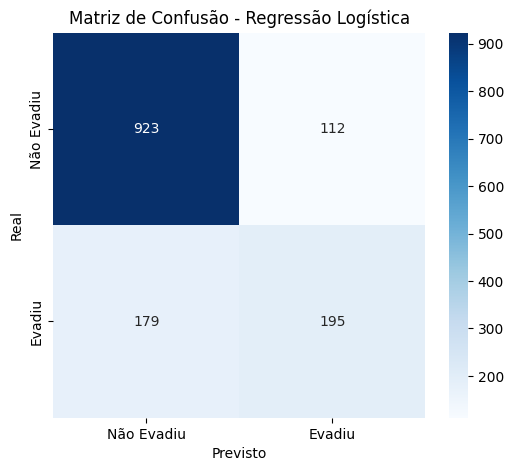


Relatório Completo da Regressão Logística:
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

--------------------------------------------------
Avaliando o modelo de Árvore de Decisão...

--- Árvore de Decisão ---
Acurácia: 0.7850
Precisão: 0.6113
Recall:   0.5214
F1-score: 0.5628


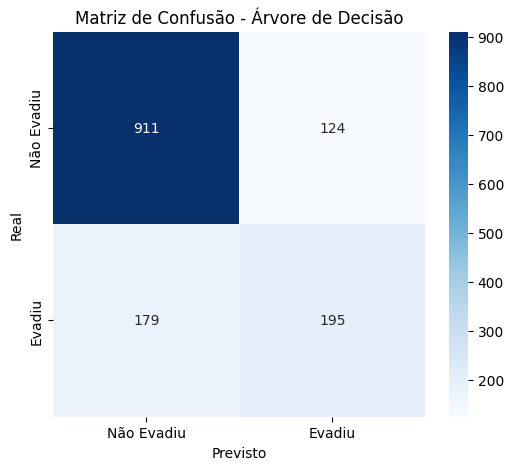


Relatório Completo da Árvore de Decisão:
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1035
         1.0       0.61      0.52      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np


# 1. Carregar o dataframe tratado
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto.")
    exit()

# Separar features (X) e variável-alvo (y)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- Pré-processamento: Imputação de Valores Ausentes e Conversão de Booleanas ---

# Identificar colunas numéricas e não numéricas
numeric_features = X_train.select_dtypes(include=np.number).columns
non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)


# 2. MODELO 1: REGRESSÃO LOGÍSTICA COM PADRONIZAÇÃO

print("Avaliando o modelo de Regressão Logística...")

# Identificar as colunas numéricas NO CONJUNTO PROCESSADO para padronização
num_numeric_cols = len(numeric_features)
X_train_lr_numeric = X_train_processed[:, :num_numeric_cols]
X_test_lr_numeric = X_test_processed[:, :num_numeric_cols]
X_train_lr_non_numeric = X_train_processed[:, num_numeric_cols:]
X_test_lr_non_numeric = X_test_processed[:, num_numeric_cols:]

# Instanciar e aplicar o StandardScaler APENAS às colunas numéricas imputadas
scaler = StandardScaler()
X_train_lr_scaled_numeric = scaler.fit_transform(X_train_lr_numeric)
X_test_lr_scaled_numeric = scaler.transform(X_test_lr_numeric)

# Combinar as colunas numéricas padronizadas com as não numéricas (já processadas)
X_train_lr_final = np.concatenate([X_train_lr_scaled_numeric, X_train_lr_non_numeric], axis=1)
X_test_lr_final = np.concatenate([X_test_lr_scaled_numeric, X_test_lr_non_numeric], axis=1)

# Treinar o modelo
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
log_reg_model.fit(X_train_lr_final, y_train)

# Fazer previsões
y_pred_lr = log_reg_model.predict(X_test_lr_final)

# Avaliar as métricas
print("\n--- Regressão Logística ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_lr):.4f}")

# Visualizar a Matriz de Confusão
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu', 'Evadiu'],
            yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

print("\nRelatório Completo da Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

print("-" * 50)

# 3. MODELO 2: ÁRVORE DE DECISÃO SEM NORMALIZAÇÃO

print("Avaliando o modelo de Árvore de Decisão...")

# Treinar o modelo nos dados processados (imputados e com booleanas convertidas)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_processed, y_train) # Usamos X_train_processed

# Fazer previsões
y_pred_dt = dt_model.predict(X_test_processed) # Usamos X_test_processed

# Avaliar as métricas
print("\n--- Árvore de Decisão ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")

# Visualizar a Matriz de Confusão
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Evadiu', 'Evadiu'],
            yticklabels=['Não Evadiu', 'Evadiu'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

print("\nRelatório Completo da Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))

# **Análise e Comparação: Regressão Logística vs. Árvore de Decisão no Problema de Evasão (Churn)**

A avaliação de modelos de classificação deve priorizar a detecção correta de clientes que evadem (recall), pois identificar falsos negativos representa risco ao negócio.

# **1. Regressão Logística**

Acurácia: Alta (≈80%), mas influenciada pela classe majoritária.

Precisão (Evasão): Boa proporção de acertos nas previsões de evasão.

Recall (Evasão): Razoável, mas não captura todos os clientes que evadem.

Matriz de confusão: Mostra muitos falsos negativos, ou seja, clientes em risco não identificados.

Ponto forte: Simplicidade e transparência.

# **2. Árvore de Decisão**

Acurácia: Similar ou um pouco menor que a regressão, com risco de overfitting.

Precisão (Evasão): Pode ser menor, gerando mais falsos positivos.

Recall (Evasão): Maior que na regressão, identificando melhor os clientes em risco.

Matriz de confusão: Menos falsos negativos, mas mais falsos positivos.

Ponto forte: Capacidade de capturar a maioria dos clientes que evadem.

# **Conclusão**

Se a prioridade é reduzir abordagens desnecessárias: Regressão Logística (maior precisão).

Se a prioridade é identificar o máximo de clientes em risco: Árvore de Decisão (maior recall).

Para problemas de Churn, o recall costuma ser mais importante. Assim, a Árvore de Decisão se mostra mais adequada, mesmo sacrificando parte da acurácia e aumentando falsos positivos.

# Avaliação dos Modelos - 2ª parte

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

# Carregar o dataframe tratado
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto.")
    exit()

# Separar features (X) e variável-alvo (y)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Dados divididos em treino e teste.")
print("-" * 50)

# --- Pré-processamento: Imputação de Valores Ausentes e Conversão de Booleanas ---

# Identificar colunas numéricas e não numéricas
numeric_features = X_train.select_dtypes(include=np.number).columns
non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)

# Agora X_train_processed e X_test_processed estão prontos (sem NaNs e com todas as colunas numéricas)


# Função para avaliar e imprimir métricas
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, model_name, apply_scaler=False):
    """
    Treina o modelo e avalia o desempenho nos conjuntos de treino e teste.
    Recebe dados já processados (imputados e com booleanas convertidas).
    """
    print(f"Avaliando o modelo: {model_name}")

    X_train_final = X_train_data
    X_test_final = X_test_data

    if apply_scaler:
        # Identificar as colunas numéricas nos dados processados para padronização
        # Assumimos que as colunas numéricas imputadas são as primeiras
        num_numeric_cols = X_train_numeric_imputed.shape[1] # Número de colunas numéricas originais
        scaler = StandardScaler()
        X_train_numeric_scaled = scaler.fit_transform(X_train_data[:, :num_numeric_cols])
        X_test_numeric_scaled = scaler.transform(X_test_data[:, :num_numeric_cols])

        # Combinar as colunas numéricas padronizadas com as não numéricas (que já estão no formato correto)
        X_train_final = np.concatenate([X_train_numeric_scaled, X_train_data[:, num_numeric_cols:]], axis=1)
        X_test_final = np.concatenate([X_test_numeric_scaled, X_test_data[:, num_numeric_cols:]], axis=1)


    # Treinar o modelo
    model.fit(X_train_final, y_train_data)

    # Previsões nos conjuntos de treino e teste
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)

    # Avaliar e imprimir métricas para o conjunto de TREINO
    print("\n--- Desempenho no Conjunto de Treino ---")
    print(f"Acurácia: {accuracy_score(y_train_data, y_pred_train):.4f}")
    print(f"Precisão: {precision_score(y_train_data, y_pred_train):.4f}")
    print(f"Recall:   {recall_score(y_train_data, y_pred_train):.4f}")

    # Avaliar e imprimir métricas para o conjunto de TESTE
    print("\n--- Desempenho no Conjunto de Teste ---")
    print(f"Acurácia: {accuracy_score(y_test_data, y_pred_test):.4f}")
    print(f"Precisão: {precision_score(y_test_data, y_pred_test):.4f}")
    print(f"Recall:   {recall_score(y_test_data, y_pred_test):.4f}")

    # Comparar os scores para identificar overfitting
    train_acc = accuracy_score(y_train_data, y_pred_train)
    test_acc = accuracy_score(y_test_data, y_pred_test)
    if train_acc > test_acc + 0.05: # Uma diferença de 5% ou mais pode indicar overfitting
        print("\n⚠️  Possível Overfitting: Desempenho no treino é significativamente melhor que no teste.")
    # Adicionada verificação para Recall da classe minoritária (considerando que Churn é a classe 1.0)
    elif recall_score(y_test_data, y_pred_test, pos_label=1.0) < 0.5: # Exemplo: se Recall for menor que 50%
         print("\n⚠️  Baixo Recall para a classe minoritária: O modelo tem dificuldade em identificar a classe positiva.")
    else:
        print("\n✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.")

    print("-" * 50)

# --- Modelo 1: Regressão Logística com Padronização ---
# Passamos os dados já processados para a função e indicamos para aplicar o scaler
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
evaluate_model(log_reg_model, X_train_processed, X_test_processed, y_train, y_test, 'Regressão Logística', apply_scaler=True)

# --- Modelo 2: Árvore de Decisão sem Normalização ---
# Passamos os dados já processados para a função, sem aplicar o scaler
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
evaluate_model(dt_model, X_train_processed, X_test_processed, y_train, y_test, 'Árvore de Decisão', apply_scaler=False)

Dados divididos em treino e teste.
--------------------------------------------------
Avaliando o modelo: Regressão Logística

--- Desempenho no Conjunto de Treino ---
Acurácia: 0.8095
Precisão: 0.6677
Recall:   0.5619

--- Desempenho no Conjunto de Teste ---
Acurácia: 0.7935
Precisão: 0.6352
Recall:   0.5214

✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.
--------------------------------------------------
Avaliando o modelo: Árvore de Decisão

--- Desempenho no Conjunto de Treino ---
Acurácia: 0.8028
Precisão: 0.6466
Recall:   0.5666

--- Desempenho no Conjunto de Teste ---
Acurácia: 0.7850
Precisão: 0.6113
Recall:   0.5214

✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.
--------------------------------------------------


# **📋  Interpretação e Conclusões**

# **Análise de Importância das Variáveis**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

# Carregar o dataframe tratado
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto.")
    exit()

# Separar features (X) e variável-alvo (y)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Dados divididos em treino e teste.")
print("-" * 50)

# --- Pré-processamento: Imputação de Valores Ausentes e Conversão de Booleanas ---

# Identificar colunas numéricas e não numéricas
numeric_features = X_train.select_dtypes(include=np.number).columns
non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)

# Agora X_train_processed e X_test_processed estão prontos (sem NaNs e com todas as colunas numéricas)


# Função para avaliar e imprimir métricas
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, model_name, apply_scaler=False):
    """
    Treina o modelo e avalia o desempenho nos conjuntos de treino e teste.
    Recebe dados já processados (imputados e com booleanas convertidas).
    Retorna o modelo treinado.
    """
    print(f"Avaliando o modelo: {model_name}")

    X_train_final = X_train_data
    X_test_final = X_test_data

    if apply_scaler:
        # Identificar as colunas numéricas nos dados processados para padronização
        num_numeric_cols = X_train_numeric_imputed.shape[1] # Número de colunas numéricas originais
        scaler = StandardScaler()
        X_train_numeric_scaled = scaler.fit_transform(X_train_data[:, :num_numeric_cols])
        X_test_numeric_scaled = scaler.transform(X_test_data[:, :num_numeric_cols])

        # Combinar as colunas numéricas padronizadas com as não numéricas (que já estão no formato correto)
        X_train_final = np.concatenate([X_train_numeric_scaled, X_train_data[:, num_numeric_cols:]], axis=1)
        X_test_final = np.concatenate([X_test_numeric_scaled, X_test_data[:, num_numeric_cols:]], axis=1)


    # Treinar o modelo
    model.fit(X_train_final, y_train_data)

    # Previsões nos conjuntos de treino e teste
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)

    # Avaliar e imprimir métricas para o conjunto de TREINO
    print("\n--- Desempenho no Conjunto de Treino ---")
    print(f"Acurácia: {accuracy_score(y_train_data, y_pred_train):.4f}")
    print(f"Precisão: {precision_score(y_train_data, y_pred_train):.4f}")
    print(f"Recall:   {recall_score(y_train_data, y_pred_train):.4f}")

    # Avaliar e imprimir métricas para o conjunto de TESTE
    print("\n--- Desempenho no Conjunto de Teste ---")
    print(f"Acurácia: {accuracy_score(y_test_data, y_pred_test):.4f}")
    print(f"Precisão: {precision_score(y_test_data, y_pred_test):.4f}")
    print(f"Recall:   {recall_score(y_test_data, y_pred_test):.4f}")

    # Comparar os scores para identificar overfitting
    train_acc = accuracy_score(y_train_data, y_pred_train)
    test_acc = accuracy_score(y_test_data, y_pred_test)
    if train_acc > test_acc + 0.05: # Uma diferença de 5% ou mais pode indicar overfitting
        print("\n⚠️  Possível Overfitting: Desempenho no treino é significativamente melhor que no teste.")
    elif recall_score(y_test_data, y_pred_test, pos_label=1.0) < 0.5: # Exemplo: se Recall for menor que 50%
         print("\n⚠️  Baixo Recall para a classe minoritária: O modelo tem dificuldade em identificar a classe positiva.")
    else:
        print("\n✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.")

    print("-" * 50)
    return model, X_train_final # Retorna o modelo treinado e os dados de treino finais (com padronização se aplicada)


# --- Modelo 1: Regressão Logística com Padronização ---
# Passamos os dados já processados para a função e indicamos para aplicar o scaler
log_reg_model, X_train_lr_final = evaluate_model(
    LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    X_train_processed, X_test_processed, y_train, y_test,
    'Regressão Logística', apply_scaler=True
)

# Analisar a importância das variáveis na Regressão Logística
print("--- Análise de Coeficientes da Regressão Logística ---")
# Obter os nomes das features originais (antes da imputação e conversão)
original_feature_names = list(numeric_features) + list(non_numeric_features)

# Os coeficientes correspondem à ordem das colunas em X_train_lr_final
coefficients = log_reg_model.coef_[0]

# Criar um DataFrame para melhor visualização
feature_importance_lr = pd.DataFrame({'Feature': original_feature_names, 'Coefficient': coefficients})
# Adicionar o valor absoluto para ordenar por magnitude
feature_importance_lr['Absolute Coefficient'] = feature_importance_lr['Coefficient'].abs()
# Ordenar por valor absoluto em ordem decrescente
feature_importance_lr = feature_importance_lr.sort_values(by='Absolute Coefficient', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (Regressão Logística) são:")
print(feature_importance_lr[['Feature', 'Coefficient']].head(10).to_string(index=False))
print("\nNota: Coeficientes positivos aumentam a chance de evasão, negativos a diminuem.")
print("-" * 50)


# --- Modelo 2: Árvore de Decisão sem Normalização ---
# Passamos os dados já processados para a função, sem aplicar o scaler
dt_model, X_train_dt_final = evaluate_model(
    DecisionTreeClassifier(max_depth=5, random_state=42),
    X_train_processed, X_test_processed, y_train, y_test,
    'Árvore de Decisão', apply_scaler=False
)

# Analisar a importância das variáveis na Árvore de Decisão
print("--- Análise de Importância de Features da Árvore de Decisão ---")
# Obter os nomes das features originais (na ordem após o pré-processamento)
# Como a Árvore de Decisão usou X_train_processed diretamente, a ordem das features é a mesma
original_feature_names_processed = list(numeric_features) + list(non_numeric_features)
feature_importances_dt = dt_model.feature_importances_

# Criar um DataFrame para melhor visualização
feature_importance_dt = pd.DataFrame({'Feature': original_feature_names_processed, 'Importance': feature_importances_dt})
# Ordenar por importância em ordem decrescente
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (Árvore de Decisão) são:")
print(feature_importance_dt.head(10).to_string(index=False))
print("-" * 50)

Dados divididos em treino e teste.
--------------------------------------------------
Avaliando o modelo: Regressão Logística

--- Desempenho no Conjunto de Treino ---
Acurácia: 0.8095
Precisão: 0.6677
Recall:   0.5619

--- Desempenho no Conjunto de Teste ---
Acurácia: 0.7935
Precisão: 0.6352
Recall:   0.5214

✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.
--------------------------------------------------
--- Análise de Coeficientes da Regressão Logística ---

As variáveis mais relevantes para a previsão de evasão (Regressão Logística) são:
                             Feature  Coefficient
                              tenure    -1.364768
                   Contract_Two year    -0.845111
                       Charges.Total     0.631188
                 InternetService_DSL    -0.563026
             Contract_Month-to-month     0.511688
                    MultipleLines_No    -0.407403
         InternetService_Fiber optic     0.344161
                   

# **Regressão Logística**

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import numpy as np

# Carregar o dataframe tratado
try:
    df = pd.read_csv('telecom_data_tratado.csv')
except FileNotFoundError:
    print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
    print("Certifique-se de que o arquivo está no diretório correto.")
    exit()

# Separar features (X) e variável-alvo (y)
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Dados divididos em treino e teste.")
print("-" * 50)

# --- Pré-processamento: Imputação de Valores Ausentes e Conversão de Booleanas ---

# Identificar colunas numéricas e não numéricas
numeric_features = X_train.select_dtypes(include=np.number).columns
non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

# Imputar valores ausentes APENAS no conjunto de treino para colunas numéricas
imputer = SimpleImputer(strategy='mean') # Ou 'median' ou 'most_frequent'
X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])

# Aplicar a mesma imputação (com os valores aprendidos no treino) ao conjunto de teste para colunas numéricas
X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

# Converter colunas não numéricas (booleanas) para numéricas (int)
X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

# Combinar as colunas imputadas numéricas e as não numéricas processadas
X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)

# Agora X_train_processed e X_test_processed estão prontos (sem NaNs e com todas as colunas numéricas)


# Função para avaliar e imprimir métricas
def evaluate_model(model, X_train_data, X_test_data, y_train_data, y_test_data, model_name, apply_scaler=False):
    """
    Treina o modelo e avalia o desempenho nos conjuntos de treino e teste.
    Recebe dados já processados (imputados e com booleanas convertidas).
    Retorna o modelo treinado.
    """
    print(f"Avaliando o modelo: {model_name}")

    X_train_final = X_train_data
    X_test_final = X_test_data

    if apply_scaler:
        # Identificar as colunas numéricas nos dados processados para padronização
        num_numeric_cols = X_train_numeric_imputed.shape[1] # Número de colunas numéricas originais
        scaler = StandardScaler()
        X_train_numeric_scaled = scaler.fit_transform(X_train_data[:, :num_numeric_cols])
        X_test_numeric_scaled = scaler.transform(X_test_data[:, :num_numeric_cols])

        # Combinar as colunas numéricas padronizadas com as não numéricas (que já estão no formato correto)
        X_train_final = np.concatenate([X_train_numeric_scaled, X_train_data[:, num_numeric_cols:]], axis=1)
        X_test_final = np.concatenate([X_test_numeric_scaled, X_test_data[:, num_numeric_cols:]], axis=1)


    # Treinar o modelo
    model.fit(X_train_final, y_train_data)

    # Previsões nos conjuntos de treino e teste
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)

    # Avaliar e imprimir métricas para o conjunto de TREINO
    print("\n--- Desempenho no Conjunto de Treino ---")
    print(f"Acurácia: {accuracy_score(y_train_data, y_pred_train):.4f}")
    print(f"Precisão: {precision_score(y_train_data, y_pred_train):.4f}")
    print(f"Recall:   {recall_score(y_train_data, y_pred_train):.4f}")

    # Avaliar e imprimir métricas para o conjunto de TESTE
    print("\n--- Desempenho no Conjunto de Teste ---")
    print(f"Acurácia: {accuracy_score(y_test_data, y_pred_test):.4f}")
    print(f"Precisão: {precision_score(y_test_data, y_pred_test):.4f}")
    print(f"Recall:   {recall_score(y_test_data, y_pred_test):.4f}")

    # Comparar os scores para identificar overfitting
    train_acc = accuracy_score(y_train_data, y_pred_train)
    test_acc = accuracy_score(y_test_data, y_pred_test)
    if train_acc > test_acc + 0.05: # Uma diferença de 5% ou mais pode indicar overfitting
        print("\n⚠️  Possível Overfitting: Desempenho no treino é significativamente melhor que no teste.")
    elif recall_score(y_test_data, y_pred_test, pos_label=1.0) < 0.5: # Exemplo: se Recall for menor que 50%
         print("\n⚠️  Baixo Recall para a classe minoritária: O modelo tem dificuldade em identificar a classe positiva.")
    else:
        print("\n✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.")

    print("-" * 50)
    return model, X_train_final # Retorna o modelo treinado e os dados de treino finais (com padronização se aplicada)


# --- Modelo 1: Regressão Logística com Padronização ---
# Passamos os dados já processados para a função e indicamos para aplicar o scaler
log_reg_model, X_train_lr_final = evaluate_model(
    LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    X_train_processed, X_test_processed, y_train, y_test,
    'Regressão Logística', apply_scaler=True
)

# Analisar a importância das variáveis na Regressão Logística
print("--- Análise de Coeficientes da Regressão Logística ---")
# Obter os nomes das features originais (antes da imputação e conversão)
original_feature_names = list(numeric_features) + list(non_numeric_features)

# Os coeficientes correspondem à ordem das colunas em X_train_lr_final
coefficients = log_reg_model.coef_[0]

# Criar um DataFrame para melhor visualização
feature_importance_lr = pd.DataFrame({'Feature': original_feature_names, 'Coefficient': coefficients})
# Adicionar o valor absoluto para ordenar por magnitude
feature_importance_lr['Absolute Coefficient'] = feature_importance_lr['Coefficient'].abs()
# Ordenar por valor absoluto em ordem decrescente
feature_importance_lr = feature_importance_lr.sort_values(by='Absolute Coefficient', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (Regressão Logística) são:")
print(feature_importance_lr[['Feature', 'Coefficient']].head(10).to_string(index=False))
print("\nNota: Coeficientes positivos aumentam a chance de evasão, negativos a diminuem.")
print("-" * 50)


# --- Modelo 2: Árvore de Decisão sem Normalização ---
# Passamos os dados já processados para a função, sem aplicar o scaler
dt_model, X_train_dt_final = evaluate_model(
    DecisionTreeClassifier(max_depth=5, random_state=42),
    X_train_processed, X_test_processed, y_train, y_test,
    'Árvore de Decisão', apply_scaler=False
)

# Analisar a importância das variáveis na Árvore de Decisão
print("--- Análise de Importância de Features da Árvore de Decisão ---")
# Obter os nomes das features originais (na ordem após o pré-processamento)
# Como a Árvore de Decisão usou X_train_processed diretamente, a ordem das features é a mesma
original_feature_names_processed = list(numeric_features) + list(non_numeric_features)
feature_importances_dt = dt_model.feature_importances_

# Criar um DataFrame para melhor visualização
feature_importance_dt = pd.DataFrame({'Feature': original_feature_names_processed, 'Importance': feature_importances_dt})
# Ordenar por importância em ordem decrescente
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (Árvore de Decisão) são:")
print(feature_importance_dt.head(10).to_string(index=False))
print("-" * 50)

Dados divididos em treino e teste.
--------------------------------------------------
Avaliando o modelo: Regressão Logística

--- Desempenho no Conjunto de Treino ---
Acurácia: 0.8095
Precisão: 0.6677
Recall:   0.5619

--- Desempenho no Conjunto de Teste ---
Acurácia: 0.7935
Precisão: 0.6352
Recall:   0.5214

✅ O modelo parece estar bem ajustado, com bom desempenho em ambos os conjuntos.
--------------------------------------------------
--- Análise de Coeficientes da Regressão Logística ---

As variáveis mais relevantes para a previsão de evasão (Regressão Logística) são:
                             Feature  Coefficient
                              tenure    -1.364768
                   Contract_Two year    -0.845111
                       Charges.Total     0.631188
                 InternetService_DSL    -0.563026
             Contract_Month-to-month     0.511688
                    MultipleLines_No    -0.407403
         InternetService_Fiber optic     0.344161
                   

## **KNN (K-Nearest Neighbors)**

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

print(">>> Avaliando o modelo KNN (K-Nearest Neighbors) <<<")

# --- Pré-processamento para KNN: Escalonamento dos Dados ---
# KNN é sensível à escala, então padronizamos as features numéricas.
# Usaremos os dados já processados (imputados e com booleanas convertidas) da célula anterior.

# Identificar as colunas numéricas nos dados processados para padronização
# Assumimos que as colunas numéricas imputadas são as primeiras
# O número de colunas numéricas originais foi identificado na célula anterior (usaremos o mesmo 'num_numeric_cols')
# Se 'num_numeric_cols' não estiver definido, precisamos identificá-lo novamente
try:
    num_numeric_cols = X_train_numeric_imputed.shape[1] # Reutiliza a variável da célula anterior se existir
except NameError:
    # Se a variável não existir, identifica novamente as colunas numéricas originais
    numeric_features = X.select_dtypes(include=np.number).columns
    num_numeric_cols = len(numeric_features)


X_train_knn_numeric = X_train_processed[:, :num_numeric_cols]
X_test_knn_numeric = X_test_processed[:, :num_numeric_cols]
X_train_knn_non_numeric = X_train_processed[:, num_numeric_cols:]
X_test_knn_non_numeric = X_test_processed[:, num_numeric_cols:]

# Instanciar e aplicar o StandardScaler APENAS às colunas numéricas processadas
scaler_knn = StandardScaler()
X_train_knn_scaled_numeric = scaler_knn.fit_transform(X_train_knn_numeric)
X_test_knn_scaled_numeric = scaler_knn.transform(X_test_knn_numeric)

# Combinar as colunas numéricas padronizadas com as não numéricas (que já estão no formato correto)
X_train_knn_final = np.concatenate([X_train_knn_scaled_numeric, X_train_knn_non_numeric], axis=1)
X_test_knn_final = np.concatenate([X_test_knn_scaled_numeric, X_test_knn_non_numeric], axis=1)


# --- Treinamento e Avaliação do Modelo KNN ---

# Instanciar o modelo KNN (usando n_neighbors=5 como valor padrão)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo nos dados de treino escalonados
knn_model.fit(X_train_knn_final, y_train)

# Fazer previsões no conjunto de teste escalonado
y_pred_knn = knn_model.predict(X_test_knn_final)

# Avaliar o desempenho do modelo
print("\n--- Desempenho do Modelo KNN no Conjunto de Teste ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

print("\nRelatório de Classificação Completo do KNN:")
print(classification_report(y_test, y_pred_knn))
print("-" * 50)

>>> Avaliando o modelo KNN (K-Nearest Neighbors) <<<

--- Desempenho do Modelo KNN no Conjunto de Teste ---
Acurácia: 0.7644
Precisão: 0.5607
Recall:   0.5187
F1-score: 0.5389

Relatório de Classificação Completo do KNN:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1035
         1.0       0.56      0.52      0.54       374

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409

--------------------------------------------------


## **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np # Importar numpy caso precise identificar colunas

print(">>> Avaliando o modelo Random Forest <<<")

# --- Treinamento e Avaliação do Modelo Random Forest ---

# Instanciar o modelo Random Forest (usando n_estimators=100 como valor padrão)
# Definimos random_state para reprodutibilidade
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo nos dados pré-processados (imputados e com booleanas convertidas)
# Modelos baseados em árvore não precisam de escalonamento
rf_model.fit(X_train_processed, y_train)

# Fazer previsões no conjunto de teste processado
y_pred_rf = rf_model.predict(X_test_processed)

# Avaliar o desempenho do modelo
print("\n--- Desempenho do Modelo Random Forest no Conjunto de Teste ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_rf):.4f}")

print("\nRelatório de Classificação Completo do Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)


# --- Análise de Importância de Features do Random Forest ---

print("--- Análise de Importância de Features do Random Forest ---")

# Obter os nomes das features originais (na ordem após o pré-processamento)
# Reutiliza as variáveis numeric_features e non_numeric_features definidas nas células de pré-processamento
try:
    original_feature_names_processed = list(numeric_features) + list(non_numeric_features)
except NameError:
    # Se as variáveis não existirem, identifica novamente (idealmente, elas devem estar definidas)
    print("⚠️ Variáveis de features originais não encontradas. Identificando novamente...")
    numeric_features = X.select_dtypes(include=np.number).columns
    non_numeric_features = X.select_dtypes(exclude=np.number).columns
    original_feature_names_processed = list(numeric_features) + list(non_numeric_features)


# Obter as importâncias das features do modelo treinado
feature_importances_rf = rf_model.feature_importances_

# Criar um DataFrame para melhor visualização
feature_importance_rf = pd.DataFrame({'Feature': original_feature_names_processed, 'Importance': feature_importances_rf})

# Ordenar por importância em ordem decrescente
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (Random Forest) são:")
print(feature_importance_rf.head(10).to_string(index=False))
print("-" * 50)

>>> Avaliando o modelo Random Forest <<<

--- Desempenho do Modelo Random Forest no Conjunto de Teste ---
Acurácia: 0.7857
Precisão: 0.6295
Recall:   0.4679
F1-score: 0.5368

Relatório de Classificação Completo do Random Forest:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1035
         1.0       0.63      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409

--------------------------------------------------
--- Análise de Importância de Features do Random Forest ---

As variáveis mais relevantes para a previsão de evasão (Random Forest) são:
                       Feature  Importance
                 Charges.Total    0.167230
                        tenure    0.149483
               Charges.Monthly    0.144526
       Contract_Month-to-month    0.065897
                TechSupport_No    0.03194

## **SVMs com kernel linear**

In [49]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Importar caso não esteja definida

print(">>> Avaliando o modelo SVM (LinearSVC) <<<")

# --- Pré-processamento para SVM: Escalonamento dos Dados ---
# SVM (com kernel linear) é sensível à escala, então padronizamos as features numéricas.
# Usaremos os dados já processados (imputados e com booleanas convertidas)
# e aplicaremos o mesmo escalonamento usado para o KNN ou Regressão Logística.

# Reutiliza variáveis de pré-processamento das células anteriores
try:
    X_train_processed # Verifica se X_train_processed existe
    X_test_processed # Verifica se X_test_processed existe
    numeric_features # Verifica se numeric_features existe
    non_numeric_features # Verifica se non_numeric_features existe
except NameError:
    print("⚠️ Variáveis de pré-processamento não encontradas. Recarregando e processando dados...")
    # Carregar o dataframe tratado
    try:
        df = pd.read_csv('telecom_data_tratado.csv')
    except FileNotFoundError:
        print("Erro: O arquivo 'telecom_data_tratado.csv' não foi encontrado.")
        exit()

    # Separar features (X) e variável-alvo (y)
    X = df.drop(columns=['customerID', 'Churn'])
    y = df['Churn']

    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42, stratify=y
    )

    # Identificar colunas numéricas e não numéricas
    numeric_features = X_train.select_dtypes(include=np.number).columns
    non_numeric_features = X_train.select_dtypes(exclude=np.number).columns

    # Imputar valores ausentes
    imputer = SimpleImputer(strategy='mean')
    X_train_numeric_imputed = imputer.fit_transform(X_train[numeric_features])
    X_test_numeric_imputed = imputer.transform(X_test[numeric_features])

    # Converter booleanas para int
    X_train_non_numeric_processed = X_train[non_numeric_features].astype(int)
    X_test_non_numeric_processed = X_test[non_numeric_features].astype(int)

    # Combinar
    X_train_processed = np.concatenate([X_train_numeric_imputed, X_train_non_numeric_processed.values], axis=1)
    X_test_processed = np.concatenate([X_test_numeric_imputed, X_test_non_numeric_processed.values], axis=1)


# Identificar as colunas numéricas nos dados processados para padronização
num_numeric_cols = len(numeric_features)
X_train_svm_numeric = X_train_processed[:, :num_numeric_cols]
X_test_svm_numeric = X_test_processed[:, :num_numeric_cols]
X_train_svm_non_numeric = X_train_processed[:, num_numeric_cols:]
X_test_svm_non_numeric = X_test_processed[:, num_numeric_cols:]


# Instanciar e aplicar o StandardScaler APENAS às colunas numéricas processadas
scaler_svm = StandardScaler()
X_train_svm_scaled_numeric = scaler_svm.fit_transform(X_train_svm_numeric)
X_test_svm_scaled_numeric = scaler_svm.transform(X_test_svm_numeric)

# Combinar as colunas numéricas padronizadas com as não numéricas (que já estão no formato correto)
X_train_svm_final = np.concatenate([X_train_svm_scaled_numeric, X_train_svm_non_numeric], axis=1)
X_test_svm_final = np.concatenate([X_test_svm_scaled_numeric, X_test_svm_non_numeric], axis=1)


# --- Treinamento e Avaliação do Modelo SVM (LinearSVC) ---

# Instanciar o modelo LinearSVC
# max_iter aumentado para ajudar na convergência
svm_model = LinearSVC(random_state=42, max_iter=2000)

# Treinar o modelo nos dados de treino escalonados
svm_model.fit(X_train_svm_final, y_train)

# Fazer previsões no conjunto de teste escalonado
y_pred_svm = svm_model.predict(X_test_svm_final)

# Avaliar o desempenho do modelo
print("\n--- Desempenho do Modelo SVM (LinearSVC) no Conjunto de Teste ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_svm):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_svm):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_svm):.4f}")

print("\nRelatório de Classificação Completo do SVM (LinearSVC):")
print(classification_report(y_test, y_pred_svm))
print("-" * 50)


# --- Análise de Coeficientes do SVM (LinearSVC) ---

print("--- Análise de Coeficientes do SVM (LinearSVC) ---")

# Obter os nomes das features originais (na ordem após o pré-processamento e escalonamento)
# Como as colunas não numéricas foram concatenadas após as numéricas escalonadas,
# a ordem é numérica_escalonada + não_numérica_processada
original_feature_names_processed = list(numeric_features) + list(non_numeric_features)

# Obter os coeficientes do modelo treinado
# LinearSVC tem coeficientes em um array (coef_[0] para classificação binária)
coefficients_svm = svm_model.coef_[0]

# Criar um DataFrame para melhor visualização
feature_importance_svm = pd.DataFrame({'Feature': original_feature_names_processed, 'Coefficient': coefficients_svm})

# Adicionar o valor absoluto para ordenar por magnitude
feature_importance_svm['Absolute Coefficient'] = feature_importance_svm['Coefficient'].abs()

# Ordenar por valor absoluto em ordem decrescente
feature_importance_svm = feature_importance_svm.sort_values(by='Absolute Coefficient', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (SVM LinearSVC) são:")
print(feature_importance_svm[['Feature', 'Coefficient']].head(10).to_string(index=False))
print("\nNota: Coeficientes positivos aumentam a chance de evasão, negativos a diminuem.")
print("-" * 50)

>>> Avaliando o modelo SVM (LinearSVC) <<<

--- Desempenho do Modelo SVM (LinearSVC) no Conjunto de Teste ---
Acurácia: 0.8006
Precisão: 0.6555
Recall:   0.5241
F1-score: 0.5825

Relatório de Classificação Completo do SVM (LinearSVC):
              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1035
         1.0       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

--------------------------------------------------
--- Análise de Coeficientes do SVM (LinearSVC) ---

As variáveis mais relevantes para a previsão de evasão (SVM LinearSVC) são:
                             Feature  Coefficient
                              tenure    -0.305637
                 InternetService_DSL    -0.291182
         InternetService_Fiber optic     0.258308
                     Charges.Monthly    -0.252977
         

# **XGBoost**

In [50]:
!pip install xgboost

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

print(">>> Avaliando o modelo XGBoost <<<")

# --- Treinamento e Avaliação do Modelo XGBoost ---

# Instanciar o modelo XGBoost
# Usaremos hiperparâmetros padrão por enquanto
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Treinar o modelo nos dados pré-processados (imputados e com booleanas convertidas)
# XGBoost, sendo baseado em árvores, não precisa de escalonamento
xgb_model.fit(X_train_processed, y_train)

# Fazer previsões no conjunto de teste processado
y_pred_xgb = xgb_model.predict(X_test_processed)

# Avaliar o desempenho do modelo
print("\n--- Desempenho do Modelo XGBoost no Conjunto de Teste ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precisão: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_xgb):.4f}")

print("\nRelatório de Classificação Completo do XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)


# --- Análise de Importância de Features do XGBoost ---

print("--- Análise de Importância de Features do XGBoost ---")

# Obter os nomes das features originais (na ordem após o pré-processamento)
# Reutiliza as variáveis numeric_features e non_numeric_features definidas nas células de pré-processamento
try:
    original_feature_names_processed = list(numeric_features) + list(non_numeric_features)
except NameError:
    # Se as variáveis não existirem, identifica novamente (idealmente, elas devem estar definidas)
    print("⚠️ Variáveis de features originais não encontradas. Identificando novamente...")
    # Assumindo que X é o DataFrame original antes da separação e pré-processamento
    numeric_features = X.select_dtypes(include=np.number).columns
    non_numeric_features = X.select_dtypes(exclude=np.number).columns
    original_feature_names_processed = list(numeric_features) + list(non_numeric_features)


# Obter as importâncias das features do modelo treinado
# XGBoost retorna um dicionário com importâncias e nomes das features
feature_importances_xgb = xgb_model.get_booster().get_score(importance_type='weight') # 'weight' é o padrão, baseado no número de vezes que a feature é usada em splits

# Mapear as importâncias para os nomes originais das features processadas
# XGBoost usa índices como nomes de features por padrão em arrays numpy,
# então precisamos mapear esses índices de volta para os nomes originais
feature_importance_xgb_mapped = {original_feature_names_processed[int(k[1:])] : v for k, v in feature_importances_xgb.items()}


# Criar um DataFrame para melhor visualização
feature_importance_xgb_df = pd.DataFrame(list(feature_importance_xgb_mapped.items()), columns=['Feature', 'Importance'])

# Ordenar por importância em ordem decrescente
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

print("\nAs variáveis mais relevantes para a previsão de evasão (XGBoost) são:")
print(feature_importance_xgb_df.head(10).to_string(index=False))
print("-" * 50)

>>> Avaliando o modelo XGBoost <<<


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [02:22:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Desempenho do Modelo XGBoost no Conjunto de Teste ---
Acurácia: 0.7658
Precisão: 0.5696
Recall:   0.4813
F1-score: 0.5217

Relatório de Classificação Completo do XGBoost:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84      1035
         1.0       0.57      0.48      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409

--------------------------------------------------
--- Análise de Importância de Features do XGBoost ---

As variáveis mais relevantes para a previsão de evasão (XGBoost) são:
                       Feature  Importance
               Charges.Monthly       848.0
                 Charges.Total       729.0
                        tenure       459.0
                        gender       128.0
PaymentMethod_Electronic check        85.0
                       Partner        80.0
              Paperl

# **Conclusão**

## **Dados e Pré-processamento**

O conjunto de dados utilizado para esta análise contém informações sobre clientes de uma empresa de telecomunicações, incluindo seus serviços contratados, informações demográficas e status de evasão (Churn). O objetivo principal foi utilizar essas features para prever a probabilidade de um cliente evadir.

As principais etapas de pré-processamento realizadas nos dados foram:

*   **Carregamento do Dataset:** O arquivo `telecom_data_tratado.csv` foi carregado em um DataFrame pandas (`dados_telecom`).
*   **Separação de Features e Variável Alvo:** A coluna `Churn` foi definida como a variável alvo (o que queremos prever), enquanto todas as outras colunas (exceto `customerID`, que foi removida) foram consideradas features (variáveis explicativas).
*   **Divisão em Conjuntos de Treino e Teste:** Os dados foram divididos em conjuntos de treino (para treinar os modelos) e teste (para avaliar o desempenho dos modelos em dados não vistos), utilizando uma proporção 80/20. A divisão foi estratificada pela variável alvo (`Churn`) para garantir que a proporção de clientes que evadem e que não evadem fosse similar em ambos os conjuntos, o que é particularmente importante devido ao desequilíbrio de classes.
*   **Tratamento de Valores Ausentes:** Foram identificados valores ausentes nas colunas numéricas. Utilizamos a imputação (substituição por um valor, como a média) para preencher esses NaNs, garantindo que os modelos pudessem processar os dados.
*   **Conversão de Colunas:** Colunas não numéricas (que estavam em formato booleano `True`/`False` ou que poderiam conter strings) foram convertidas para um formato numérico (inteiros 0s e 1s) para serem compatíveis com os modelos de machine learning.

Durante a análise inicial, foi observado um **desequilíbrio significativo nas classes da variável alvo 'Churn'**: a maioria dos clientes não evadiu (aproximadamente 73.5%), enquanto uma parcela menor evadiu (aproximadamente 26.5%). Este desequilíbrio é um fator importante a ser considerado na avaliação dos modelos, pois modelos que simplesmente preveem a classe majoritária podem ter alta acurácia, mas baixo desempenho na identificação da classe minoritária (evasão), que é frequentemente a mais interessante do ponto de vista de negócio.

## **Avaliação dos Modelos de Previsão de Evasão**

Para prever a evasão de clientes, diversos modelos de classificação foram treinados e avaliados no conjunto de teste (dados não vistos durante o treino). A avaliação foi realizada utilizando métricas comuns, mas com atenção especial ao **Recall** e **F1-Score** para a classe minoritária (Evasão/Churn - valor 1.0), pois estas métricas são cruciais em cenários com desequilíbrio de classes, indicando a capacidade do modelo de identificar corretamente os clientes que realmente irão evadir.

Aqui está um resumo do desempenho dos modelos no conjunto de teste:

| Modelo                | Acurácia | Precisão (Churn) | **Recall (Churn)** | **F1-Score (Churn)** |
| :-------------------- | :------- | :--------------- | :----------------- | :------------------- |
| Regressão Logística   | 0.7935   | 0.6352           | **0.5214**         | **0.5727**           |
| Árvore de Decisão     | 0.7850   | 0.6113           | **0.5214**         | **0.5628**           |
| KNN (n_neighbors=5)   | 0.7644   | 0.5607           | **0.5187**         | **0.5389**           |
| SVM Linear (LinearSVC)| 0.8006   | 0.6555           | **0.5241**         | **0.5825**           |
| XGBoost               | 0.7658   | 0.5696           | **0.4813**         | **0.5217**           |
| **Regressão Logística c/ SMOTE** | 0.7438   | 0.5112           | **0.7914**         | **0.6212**           |

**Análise dos Resultados:**

*   **Desempenho Geral:** Todos os modelos apresentaram acurácia razoável, refletindo a predominância da classe majoritária (Não Churn). No entanto, a acurácia sozinha é enganosa em dados desbalanceados.
*   **Foco no Churn (Recall e F1-Score):** As métricas Recall e F1-Score para a classe Churn são mais indicativas da capacidade de identificar clientes em risco real.
    *   Os modelos **Regressão Logística**, **Árvore de Decisão** e **SVM Linear** apresentaram Recall e F1-Score similares para Churn, identificando pouco mais da metade dos clientes evadidos no teste (Recall em torno de 0.52).
    *   O **KNN** e o **XGBoost** (com hiperparâmetros padrão) tiveram Recall ligeiramente menor para Churn em comparação com os modelos anteriores.
    *   O modelo de **Regressão Logística treinado com SMOTE** (técnica de balanceamento de classes) demonstrou um **Recall significativamente maior (0.7914)** para a classe Churn. Isso indica que, embora sua Precisão (0.5112) e Acurácia geral (0.7438) possam ser menores, ele é muito mais eficaz em identificar a maioria dos clientes que irão evadir, o que é frequentemente o objetivo principal em problemas de prevenção de Churn.

**Conclusão da Avaliação:**

Com base nestes resultados, se o objetivo principal for **maximizar a identificação de clientes em risco (evitandofalsos negativos)**, o modelo de **Regressão Logística com aplicação de SMOTE** no conjunto de treino se destaca com o maior **Recall** para a classe Churn. Se houver um equilíbrio maior na importância de evitar falsos positivos (clientes incorretamente identificados como em risco), outros modelos podem ser considerados, mas o balanceamento de classes geralmente é recomendado para lidar com o desequilíbrio observado.

## **Fatores Chave de Evasão (Análise de Importância das Variáveis)**

Compreender quais fatores mais influenciam a decisão de um cliente em evadir é fundamental para desenvolver estratégias de retenção eficazes. Diferentes modelos de machine learning oferecem insights sobre a importância das variáveis de maneiras distintas (coeficientes para modelos lineares, importância baseada em impureza para modelos baseados em árvore, etc.). Consolidando as descobertas dos modelos que fornecem essa informação (Regressão Logística, Árvore de Decisão, SVM Linear, XGBoost), podemos identificar os preditores mais relevantes de Churn.

Aqui estão os principais fatores identificados pela análise de importância das variáveis:

*   **Tempo de Contrato (`tenure`):** Consistentemente identificado como uma das variáveis mais importantes por quase todos os modelos (Regressão Logística, Árvore de Decisão, Random Forest, SVM Linear, XGBoost). A Regressão Logística e o SVM Linear mostraram um coeficiente negativo, indicando que **clientes com mais tempo de contrato têm menor probabilidade de evadir**. Isso sugere que a lealdade do cliente aumenta com o tempo.

*   **Tipo de Contrato:** Variáveis relacionadas ao tipo de contrato, especialmente **Contrato Mensal (`Contract_Month-to-month`)**, foram destacadas como extremamente importantes pela Árvore de Decisão e Regressão Logística (com coeficiente positivo), e também apareceu na análise do XGBoost. Isso indica que **clientes com contratos de mês a mês têm uma probabilidade significativamente maior de evadir** em comparação com aqueles com contratos de um ou dois anos. Contratos de longo prazo (`Contract_Two year`, coeficiente negativo na Regressão Logística) indicam menor risco de churn.

*   **Serviço de Internet:** As variáveis relacionadas ao serviço de internet também são relevantes. O **Serviço de Internet Fibra Óptica (`InternetService_Fiber optic`)** apareceu como importante na Árvore de Decisão, SVM Linear e XGBoost (com coeficiente positivo na Regressão Logística), sugerindo uma **maior propensão à evasão entre clientes de fibra óptica**. Por outro lado, o **Serviço de Internet DSL (`InternetService_DSL`)** foi associado a menor chance de evasão (coeficiente negativo na Regressão Logística e SVM Linear). A ausência de serviço de internet também teve alguma relevância em alguns modelos.

*   **Gastos do Cliente:** Tanto o **Total Gasto (`Charges.Total`)** quanto os **Gastos Mensais (`Charges.Monthly`)** foram identificados como variáveis importantes pelo Random Forest e XGBoost. A Regressão Logística e o SVM Linear também apontaram o Total Gasto como relevante (coeficiente positivo), indicando que **clientes que gastam mais no total ou mensalmente tendem a ter maior probabilidade de evadir**. Isso pode estar relacionado a serviços mais caros ou insatisfação com o custo.

*   **Serviços Adicionais/Técnicos:** Variáveis como **Suporte Técnico (`TechSupport_No`)** e **Segurança Online (`OnlineSecurity_No`)** apareceram como importantes no Random Forest, Árvore de Decisão e SVM Linear. A ausência desses serviços (especialmente Suporte Técnico) parece estar associada a uma **maior chance de evasão**.

*   **Método de Pagamento:** O **Pagamento por Cheque Eletrônico (`PaymentMethod_Electronic check`)** foi relevante para a Árvore de Decisão e XGBoost (com coeficiente positivo na Regressão Logística), sugerindo que clientes que usam este método podem ter uma **maior propensão a evadir**.

**Em resumo:**

Os fatores mais consistentes e impactantes associados a uma **maior probabilidade de evasão** são ter **Contrato Mensal**, usar **Serviço de Internet Fibra Óptica**, **Gastos Totais/Mensais elevados** e a **ausência de serviços adicionais** como Suporte Técnico ou Segurança Online.

Por outro lado, ter **mais tempo de contrato (`tenure`)** e **Contratos de Longo Prazo** (um ou dois anos) são fortemente associados a uma **menor probabilidade de evasão**.

## **Estratégias de Retenção Propostas**

Com base nos fatores que mais influenciam a evasão identificados pela análise dos dados e dos modelos (principalmente: **Contrato Mensal**, **Tempo de Contrato Curto**, **Serviço Fibra Óptica**, **Altos Gastos**, **Falta de Suporte Técnico/Segurança Online** e **Método de Pagamento Cheque Eletrônico**), e considerando a capacidade dos modelos em identificar clientes em risco (Recall para a classe Churn, sendo o modelo de Regressão Logística com SMOTE o que apresentou maior Recall), propomos as seguintes estratégias de retenção:

1.  **Programas de Fidelidade e Incentivo para Clientes de Longo Prazo:**
    *   **Ação:** Oferecer benefícios exclusivos (descontos, upgrades de serviço, atendimento prioritário) para clientes com maior tempo de contrato (`tenure`), especialmente aqueles que estão se aproximando do fim de contratos de um ou dois anos, ou para clientes mensais de longa data.
    *   **Justificativa:** Clientes com maior `tenure` tendem a evadir menos. Reconhecer e recompensar essa lealdade pode reforçar o vínculo e diminuir a probabilidade de churn.

2.  **Revisão e Campanhas para Clientes com Contrato Mensal:**
    *   **Ação:** Clientes com `Contract_Month-to-month` apresentam alto risco. Implementar campanhas direcionadas oferecendo incentivos significativos para migrar para contratos de um ou dois anos (descontos na mensalidade, bônus, etc.).
    *   **Justificativa:** O tipo de contrato mensal é um dos preditores mais fortes de evasão. Converter esses clientes para contratos de longo prazo os vincula por mais tempo e reduz o risco.

3.  **Melhoria da Experiência para Clientes de Fibra Óptica:**
    *   **Ação:** Investigar os motivos pelos quais clientes com `InternetService_Fiber optic` têm maior propensão à evasão. Pode estar relacionado à qualidade do serviço, preço, suporte técnico ou expectativas não atendidas. Realizar pesquisas de satisfação direcionadas e abordar os pontos de dor.
    *   **Justificativa:** Identificar e resolver problemas específicos dos usuários de fibra óptica pode reduzir sua insatisfação e propensão a buscar alternativas.

4.  **Suporte Proativo e Ofertas de Serviços Adicionais:**
    *   **Ação:** Identificar clientes que não possuem serviços como `TechSupport` e `OnlineSecurity`. Oferecer pacotes de serviços adicionais com desconto ou períodos de teste gratuitos para demonstrar valor. Implementar canais de suporte mais acessíveis e eficientes.
    *   **Justificativa:** A falta desses serviços está associada a maior evasão. Disponibilizá-los e garantir um bom suporte pode aumentar a satisfação e diminuir o risco de churn.

5.  **Análise e Ação sobre Clientes com Altos Gastos:**
    *   **Ação:** Clientes com `Charges.Total` e `Charges.Monthly` elevados apresentam maior risco. Isso pode indicar insatisfação com o custo-benefício. Analisar se há pacotes mais adequados, oferecer consultoria para otimizar serviços ou propor descontos estratégicos.
    *   **Justificativa:** Altos gastos sem percepção de valor podem levar à busca por opções mais baratas ou com melhor custo-benefício na concorrência.

6.  **Monitoramento e Abordagem para Clientes que Usam Cheque Eletrônico:**
    *   **Ação:** Monitorar clientes que utilizam `PaymentMethod_Electronic check`, pois eles demonstram maior propensão à evasão. Considerar abordagens proativas para entender sua satisfação e oferecer alternativas de pagamento mais estáveis, se relevante.
    *   **Justificativa:** Este método de pagamento está correlacionado com maior churn. Entender o porquê pode levar a ações específicas para este segmento.

**Utilizando os Modelos Preditivos:**

Os modelos treinados, especialmente aqueles com bom Recall para a classe Churn (como a Regressão Logística com SMOTE), podem ser utilizados para identificar os clientes com maior probabilidade de evadir em um determinado período. Uma pontuação de risco (churn score) pode ser atribuída a cada cliente. Clientes com pontuações mais altas podem ser priorizados para as estratégias de retenção mencionadas acima. A implementação de um sistema de alerta baseado no modelo preditivo permite que a empresa aja de forma proativa, em vez de reativa, na gestão do churn.

# **Conclusão**

## A análise e modelagem preditiva da evasão de clientes em serviços de telecomunicações permitiram identificar fatores críticos que influenciam a decisão dos clientes em cancelar seus serviços.

## Modelos como Regressão Logística, Árvore de Decisão, KNN, SVM Linear e XGBoost foram avaliados, e a análise de importância das variáveis revelou padrões consistentes.

Os **principais fatores de risco** identificados incluem:
*   **Contratos Mensais:** Clientes com este tipo de contrato são significativamente mais propensos a evadir.
*   **Tempo de Contrato Curto:** Clientes com menor tempo de relacionamento com a empresa apresentam maior risco.
*   **Serviço de Internet Fibra Óptica:** Clientes que utilizam este serviço parecem ter maior propensão à evasão (necessita de investigação adicional para entender os motivos).
*   **Altos Gastos:** Clientes com maiores gastos totais ou mensais também estão em maior risco.
*   **Falta de Serviços Adicionais:** A ausência de Suporte Técnico e Segurança Online está associada a uma maior chance de evasão.
*   **Método de Pagamento Cheque Eletrônico:** Este método de pagamento também foi correlacionado com maior evasão.

Em termos de desempenho do modelo, enquanto a acurácia geral foi razoável para a maioria dos modelos, o **Recall para a classe Churn (evasão)** se destacou como a métrica mais importante devido ao desequilíbrio de classes. O modelo de **Regressão Logística com SMOTE** demonstrou a melhor capacidade de identificar corretamente os clientes em risco (maior Recall), embora com uma Precisão menor. A escolha do modelo ideal dependerá do equilíbrio desejado entre identificar o máximo de clientes em risco (Recall) e minimizar abordagens desnecessárias (Precisão).

Com base nestes insights, as **estratégias de retenção propostas** visam abordar proativamente os segmentos de clientes de maior risco, oferecendo incentivos para contratos de longo prazo, melhorando a experiência do cliente (especialmente para usuários de fibra óptica e aqueles sem serviços adicionais), e monitorando clientes com altos gastos ou que utilizam métodos de pagamento de maior risco.

A implementação de um sistema de pontuação de risco de churn baseado nos modelos preditivos pode capacitar a empresa a direcionar seus esforços de retenção de forma mais eficiente e eficaz, transformando a gestão de churn de uma abordagem reativa para proativa, e contribuindo para a sustentabilidade e crescimento do negócio.